# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

# Eu tive alguns erros e dificuldades de execução no Google Colab, deixei todas minhas tentativas de soluções aqui em cima e também todos os imports nessas próximas células.

In [185]:
from google.colab import files
uploaded = files.upload

In [186]:
import os
os.listdir()

['.config',
 'Profissao Analista de dados M13 Exercicio cidades-bruto.csv',
 'Profissao Analista de dados M13 Exercicio original.xml',
 'cidades-limpo.csv',
 '.ipynb_checkpoints',
 'estados-limpo.csv',
 'brasil.csv',
 'sample_data']

Simplesmente havia momentos que eu não conseguia usar o xml parser do pandas, nem no meu computador local. Tanto que eu nem consegui rodar esse notebook no VSCode porque ele simplesmente não processava o xml, só conseguir rodar com o html.parser mas ele não faz o que é necessário pra processar dados. Instalei e desinstalei o lxml localmente várias vezes, usei cmd em vez do powershell do VSCode e mesmo assim não consegui.
Consegui rodar localmente somente com o Jupyter, que rodou sem problemas.

In [187]:
!pip install lxml

In [188]:
!pip install unidecode

from unidecode import unidecode

In [189]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from unidecode import unidecode



In [190]:
with open(file='Profissao Analista de dados M13 Exercicio original.xml', mode='r', encoding='utf8') as fp:
  conteudo_xml = fp.read()

In [191]:
fonte = BeautifulSoup(conteudo_xml, 'lxml-xml')
fonte

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [192]:
itens = fonte.find_all('ESTADO')

conteudo = []
conteudo_processado = []

for i in itens:
  nome = i.find('NOME').text
  sigla = i.find('SIGLA').text
  regiao = i.find('REGIAO').text
  conteudo.append(nome)
  conteudo.append(sigla)
  conteudo.append(regiao)

for j in range(0,len(conteudo),3):
  conteudo_processado.append(conteudo[j:j+3])

for i in conteudo_processado:
  print(i)



['ACRE', 'AC', 'NORTE']
['ALAGOAS', 'AL', 'NORDESTE']
['AMAPA', 'AP', 'NORTE']
['AMAZONAS', 'AM', 'NORTE']
['BAHIA', 'BA', 'NORDESTE']
['CEARA', 'CE', 'NORDESTE']
['DISTRITO FEDERAL', 'DF', 'CENTRO-OESTE']
['ESPIRITO SANTO', 'ES', 'SUDESTE']
['GOIAS', 'GO', 'CENTRO-OESTE']
['MARANHAO', 'MA', 'NORDESTE']
['MATO GROSSO', 'MT', 'CENTRO-OESTE']
['MATO GROSSO DO SUL', 'MS', 'CENTRO-OESTE']
['PARA', 'PA', 'NORTE']
['PARAIBA', 'PB', 'NORDESTE']
['PARANA', 'PR', 'SUL']
['PERNAMBUCO', 'PE', 'NORDESTE']
['PIAUI', 'PI', 'NORDESTE']
['RIO DE JANEIRO', 'RJ', 'SUDESTE']
['RIO GRANDE DO NORTE', 'RN', 'NORDESTE']
['RIO GRANDE DO SUL', 'RS', 'SUL']
['RONDONIA', 'RO', 'NORTE']
['RORAIMA', 'RR', 'NORTE']
['SANTA CATARINA', 'SC', 'SUL']
['SAO PAULO', 'SP', 'SUDESTE']
['SERGIPE', 'SE', 'NORDESTE']
['TOCANTINS', 'TO', 'NORTE']
['MINAS GERAIS', 'MG', 'SUDESTE']


In [193]:
headers = ['estado','sigla','regiao']

with open(file='estados-limpo.csv', mode='w',encoding='utf-8') as fp:
  escritor = csv.writer(fp,delimiter=';')
  escritor.writerow(headers)
  escritor.writerows(conteudo_processado)

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [194]:
fonte

<?xml version="1.0" encoding="utf-8"?>
<ESTADOS>
<ESTADO>
<ID>1</ID>
<NOME>ACRE</NOME>
<IDCAPITAL>16</IDCAPITAL>
<SIGLA>AC</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>2</ID>
<NOME>ALAGOAS</NOME>
<IDCAPITAL>68</IDCAPITAL>
<SIGLA>AL</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>3</ID>
<NOME>AMAPA</NOME>
<IDCAPITAL>131</IDCAPITAL>
<SIGLA>AP</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>4</ID>
<NOME>AMAZONAS</NOME>
<IDCAPITAL>178</IDCAPITAL>
<SIGLA>AM</SIGLA>
<REGIAO>NORTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>5</ID>
<NOME>BAHIA</NOME>
<IDCAPITAL>536</IDCAPITAL>
<SIGLA>BA</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>6</ID>
<NOME>CEARA</NOME>
<IDCAPITAL>676</IDCAPITAL>
<SIGLA>CE</SIGLA>
<REGIAO>NORDESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>7</ID>
<NOME>DISTRITO FEDERAL</NOME>
<IDCAPITAL>916</IDCAPITAL>
<SIGLA>DF</SIGLA>
<REGIAO>CENTRO-OESTE</REGIAO>
</ESTADO>
<ESTADO>
<ID>8</ID>
<NOME>ESPIRITO SANTO</NOME>
<IDCAPITAL>879</IDCAPITAL>
<SIGLA>ES</SIGLA>
<REGIAO>SU

In [195]:
# Aqui houveram vários problemas, coloquei essa verificação antes da leitura
# porque simplesmente dava erro e depois rodava normal sem nenhum critério
# Deixei a minha solução no começo do notebook e somente assim o csv rodou


try:
  fonte = pd.read_csv(
      'Profissao Analista de dados M13 Exercicio cidades-bruto.csv',
      sep=',',
      usecols=['UF','nome','PIB','Pop_est_2009','PIB_percapita'],
      quotechar='"',
      on_bad_lines='warn')
except pd.errors.ParserError as e:
  print(f'Erro ao tentar ler o arquivo: {e}')

fonte.columns = ['estado', 'nome', 'pib', 'populacao', 'pib_percapita']
fonte['estado'] = fonte['estado'].apply(lambda x: unidecode(x))
fonte.to_csv('cidades-limpo.csv',sep=';')

# Uma solução pra conseguir fazer o merge dos dois df, foi tirar a acentuação da
# coluna estado convertendo pra unidecode, que o xml já estava.

In [196]:
fonte

,estado,nome,pib,populacao,pib_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUI,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANA,Planalto,1.385535e+05,13983,9908.709961
5563,SAO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [197]:
estados_df = pd.read_csv('estados-limpo.csv',sep=';')
estados_df =  estados_df.applymap(lambda x: unidecode(x))
cidades_df = pd.read_csv('cidades-limpo.csv', sep=';')

In [198]:
estados_df

,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE
5,CEARA,CE,NORDESTE
6,DISTRITO FEDERAL,DF,CENTRO-OESTE
7,ESPIRITO SANTO,ES,SUDESTE
8,GOIAS,GO,CENTRO-OESTE
9,MARANHAO,MA,NORDESTE


In [199]:
cidades_df

,Unnamed: 0,estado,nome,pib,populacao,pib_percapita
0,0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,4,PIAUI,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...,...
5561,5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,5562,PARANA,Planalto,1.385535e+05,13983,9908.709961
5563,5563,SAO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [200]:
brasil = pd.merge(left=cidades_df, right=estados_df, on='estado', how='outer')
brasil.to_csv('brasil.csv', sep=';')

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [201]:
brasil_df = pd.read_csv('brasil.csv', sep=';', index_col=0)

In [202]:
# estava tendo várias colunas replicadas, achei essa solução
brasil_df = brasil_df.loc[:,~brasil_df.columns.str.contains('^Unnamed')]
brasil_df

,estado,nome,pib,populacao,pib_percapita,sigla,regiao
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990,BA,NORDESTE
1,BAHIA,Maetinga,2.355845e+04,7884,2988.129883,BA,NORDESTE
2,BAHIA,Ibirapuã,7.499741e+04,7893,9501.759766,BA,NORDESTE
3,BAHIA,Governador Mangabeira,9.290382e+04,20668,4495.060059,BA,NORDESTE
4,BAHIA,Ibititá,6.236689e+04,19410,3213.129883,BA,NORDESTE
...,...,...,...,...,...,...,...
5561,AMAPA,Serra do Navio,1.097953e+05,3982,27572.900391,AP,NORTE
5562,AMAPA,Ferreira Gomes,6.993773e+04,5475,12774.009766,AP,NORTE
5563,AMAPA,Tartarugalzinho,1.199880e+05,13769,8714.360352,AP,NORTE
5564,AMAPA,Macapá,4.679694e+06,366484,12769.160156,AP,NORTE


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [203]:
top_10_cidades_pop = brasil_df.sort_values(by='populacao', ascending=False)
top_10_cidades_pop.head(10)

,estado,nome,pib,populacao,pib_percapita,sigla,regiao
3278,SAO PAULO,São Paulo,389317152.0,11037593,35271.929688,SP,SUDESTE
4512,RIO DE JANEIRO,Rio de Janeiro,175739344.0,6186710,28405.949219,RJ,SUDESTE
44,BAHIA,Salvador,32824228.0,2998056,10948.500000,BA,NORDESTE
5565,DISTRITO FEDERAL,Brasília,131487264.0,2606885,50438.460938,DF,CENTRO-OESTE
4228,CEARA,Fortaleza,31789186.0,2505552,12687.500000,CE,NORDESTE
1736,MINAS GERAIS,Belo Horizonte,44595204.0,2452617,18182.699219,MG,SUDESTE
4860,PARANA,Curitiba,45762420.0,1851215,24720.210938,PR,SUL
3727,AMAZONAS,Manaus,40486108.0,1738641,23286.060547,AM,NORTE
2439,PERNAMBUCO,Recife,24835340.0,1561659,15903.179688,PE,NORDESTE
2628,PARA,Belém,16526989.0,1437600,11496.240234,PA,NORTE


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [204]:
cinco_menores_pib_NE = brasil_df.query("regiao == 'NORDESTE'")
cinco_menores_pib_NE = cinco_menores_pib_NE.sort_values(by='pib_percapita', ascending=True)
cinco_menores_pib_NE.head(5)

,estado,nome,pib,populacao,pib_percapita,sigla,regiao
4471,MARANHAO,São Vicente Ferrer,39492.960938,20463,1929.969971,MA,NORDESTE
4366,MARANHAO,Cajapió,22781.035156,10337,2203.830078,MA,NORDESTE
69,BAHIA,Lamarão,30241.320312,12995,2327.149902,BA,NORDESTE
1849,PIAUI,Dom Inocêncio,25457.230469,10795,2358.239990,PI,NORDESTE
4491,MARANHAO,Timbiras,63724.851562,26909,2368.159912,MA,NORDESTE


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [205]:
top15_pi_SP = brasil_df.query("sigla == 'SP'")
top15_pi_SP = top15_pi_SP.sort_values(by='pib', ascending=False)
top15_pi_SP.head(15)

,estado,nome,pib,populacao,pib_percapita,sigla,regiao
3278,SAO PAULO,São Paulo,389317152.0,11037593,35271.929688,SP,SUDESTE
3230,SAO PAULO,Guarulhos,32473828.0,1299283,24993.650391,SP,SUDESTE
3347,SAO PAULO,Campinas,31654720.0,1064669,29731.980469,SP,SUDESTE
3112,SAO PAULO,Osasco,31616452.0,718646,43994.468750,SP,SUDESTE
2815,SAO PAULO,São Bernardo do Campo,28935768.0,810979,35680.050781,SP,SUDESTE
3351,SAO PAULO,Barueri,26908070.0,270173,99595.703125,SP,SUDESTE
2772,SAO PAULO,Santos,22546134.0,417098,54054.761719,SP,SUDESTE
2999,SAO PAULO,São José dos Campos,22018042.0,615871,35751.058594,SP,SUDESTE
3019,SAO PAULO,Jundiaí,16585137.0,349929,47395.718750,SP,SUDESTE
2821,SAO PAULO,Santo André,14709603.0,673396,21843.910156,SP,SUDESTE


 - Qual é o PIB do estado de Santa Catarina?

In [206]:
pib_SC = brasil_df.query("sigla == 'SC'")
pib_SC = pib_SC['pib'].agg('sum')
print(f'o pib de Santa Caratina é de: {pib_SC}')

o pib de Santa Caratina é de: 129806256.75195317


 - Qual é o população da região sul?

In [207]:
pop_SUL = brasil_df.query("regiao == 'SUL'")
pop_SUL = pop_SUL['populacao'].agg('sum')
print(f'A população da região sul é de {pop_SUL} habitantes')

A população da região sul é de 27719118 habitantes


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [208]:
media_pib_pc_MS = brasil_df.query("sigla == 'MS'")
media_pib_pc_MS = media_pib_pc_MS['pib_percapita'].agg('mean')
print(f"Média do PIB per Capita do MS: {media_pib_pc_MS}")


Média do PIB per Capita do MS: 14458.896859975644


 - Qual é a população do Brasil?

In [209]:
pop_Brasil = brasil_df['populacao'].agg('sum')
print(f'A população do Brasil é de {pop_Brasil} habitantes')


A população do Brasil é de 191501418 habitantes


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [210]:
top_10_cidadesmenos_pop = brasil_df.sort_values(by='populacao', ascending=True)
top_10_cidadesmenos_pop = top_10_cidadesmenos_pop.head(10)

<Axes: xlabel='nome'>

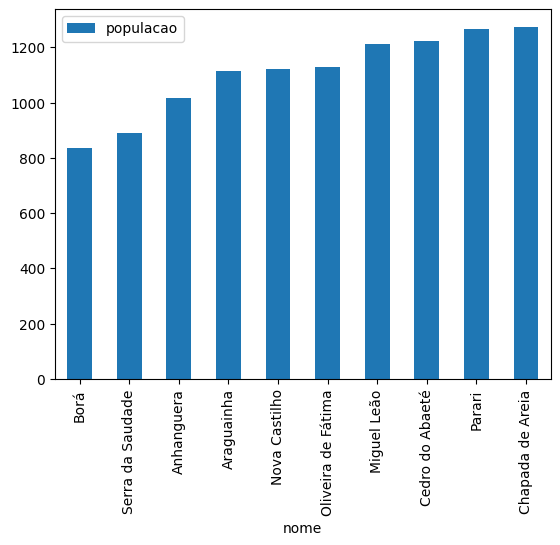

In [211]:
top_10_cidadesmenos_pop.plot(kind='bar', x='nome',y='populacao',legend=True)

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [212]:
brasil_pop = brasil_df[['populacao','regiao']]
grouped_pop_df = brasil_pop.groupby('regiao').agg('sum')
grouped_pop_df

,populacao
regiao,
CENTRO-OESTE,13895375
NORDESTE,53611985
NORTE,15359608
SUDESTE,80915332
SUL,27719118


<Axes: ylabel='populacao'>

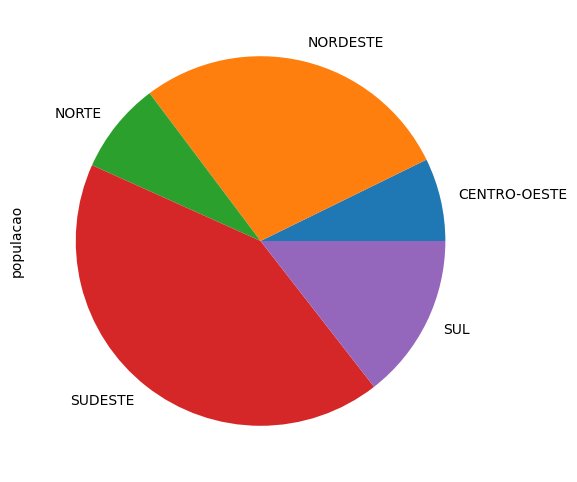

In [213]:
grouped_pop_df.plot.pie(y='populacao', figsize=(11,6), legend=False)